# Metis Take Home Practice
We will be using New York City CitiBike data for this analysis. CitiBike is New York City's public
bike sharing program which opened in May 2013. Bicycles are rented and then returned to various stations located throughout Manhattan, Brooklyn, and Queens. Memberships and various time-limited passes are available for purchase.

Python libraries should be used to answer all questions except the last one, where any tool(s) can be used. Your analysis should be performed and annotated so that it could easily be handed off to another data scientist in the group. This exercise is designed to require 4 – 8 hours to complete.

In [13]:
from __future__ import print_function, division
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

# various options in pandas
pd.set_option('display.max_columns', None) #does not print every single column, would be tedious
pd.set_option('display.max_rows', 25) #how many rows, it truncates
pd.set_option('display.precision', 3) #how many digits to print

## Question 1
• Programmatically acquire, load, and prepare CitiBike data for the year 2015

• How many data points are there in the data used for analysis? **Answer: 9,937,969 entries**

In [3]:
import os
print(os.listdir('CitiBike_2015'))

['201501-citibike-tripdata.csv', '201502-citibike-tripdata.csv', '201503-citibike-tripdata.csv', '201504-citibike-tripdata.csv', '201505-citibike-tripdata.csv', '201506-citibike-tripdata.csv', '201507-citibike-tripdata.csv', '201508-citibike-tripdata.csv', '201509-citibike-tripdata.csv', '201510-citibike-tripdata.csv', '201511-citibike-tripdata.csv', '201512-citibike-tripdata.csv']


In [4]:
#make the dataframe by concat all the different excel files
def concat_dfs(data_files_dir):
    data_dir = os.listdir(data_files_dir)
    dfs = []
    for excel_sheet in data_dir:
        print(excel_sheet)
        dfs.append(pd.read_csv(data_files_dir + excel_sheet))
    return pd.concat(dfs)
#I could have used a pandas append data frame, after initializing the first data frame.
#could have grabbed the urls from online

In [6]:
CitiBike_df = concat_dfs('CitiBike_2015/')

201501-citibike-tripdata.csv
201502-citibike-tripdata.csv
201503-citibike-tripdata.csv
201504-citibike-tripdata.csv
201505-citibike-tripdata.csv
201506-citibike-tripdata.csv
201507-citibike-tripdata.csv
201508-citibike-tripdata.csv
201509-citibike-tripdata.csv
201510-citibike-tripdata.csv
201511-citibike-tripdata.csv
201512-citibike-tripdata.csv


In [7]:
CitiBike_df = CitiBike_df.reset_index() #otherwise, it'll be as if you are stacking each df instead of true concat
#could have done drop=True, so that you can drop the index column

In [8]:
CitiBike_df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750,-73.969,265,Stanton St & Chrystie St,40.722,-73.991,18660,Subscriber,1960.0,2
1,1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743,-74.004,482,W 15 St & 7 Ave,40.739,-73.999,16085,Subscriber,1963.0,1
2,2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.741,-73.986,505,6 Ave & W 33 St,40.749,-73.988,20845,Subscriber,1974.0,1
3,3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683,-73.966,399,Lafayette Ave & St James Pl,40.689,-73.965,19610,Subscriber,1969.0,1
4,4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745,-73.987,432,E 7 St & Avenue A,40.726,-73.984,20197,Subscriber,1977.0,1


In [9]:
CitiBike_df.tail()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
9937964,804120,509,12/31/2015 16:50:17,12/31/2015 16:58:46,3242,Schermerhorn St & Court St,40.691,-73.992,261,Johnson St & Gold St,40.695,-73.984,22282,Subscriber,1957.0,1
9937965,804121,591,12/31/2015 17:17:52,12/31/2015 17:27:43,3242,Schermerhorn St & Court St,40.691,-73.992,258,DeKalb Ave & Vanderbilt Ave,40.689,-73.969,22366,Subscriber,1978.0,1
9937966,804122,197,12/31/2015 17:56:22,12/31/2015 17:59:39,3242,Schermerhorn St & Court St,40.691,-73.992,157,Henry St & Atlantic Ave,40.691,-73.996,20663,Subscriber,1959.0,1
9937967,804123,372,12/31/2015 21:20:38,12/31/2015 21:26:50,3242,Schermerhorn St & Court St,40.691,-73.992,467,Dean St & 4 Ave,40.683,-73.979,19782,Subscriber,1987.0,1
9937968,804124,395,12/31/2015 21:49:19,12/31/2015 21:55:55,3242,Schermerhorn St & Court St,40.691,-73.992,418,Front St & Gold St,40.702,-73.983,23411,Subscriber,1968.0,1


In [10]:
CitiBike_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9937969 entries, 0 to 9937968
Data columns (total 16 columns):
index                      int64
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 float64
gender                     int64
dtypes: float64(5), int64(6), object(5)
memory usage: 1.2+ GB


## Question 2
• Plot the distribution of the trip duration. **Answer: Using Histogram**

• Describe the structure and hypotheses you have about that structure. **Answer: Right-skewed distribution, and that most people are renting bikes for about or close to 370 seconds (mode) even though the average duration is 968 seconds (mean).**


In [11]:
trip_duration = CitiBike_df['tripduration'] #select only the column we want
print(max(trip_duration)) #this is clearly wrong! it's an outlier. must find reasonable range.

5864661


In [ ]:
#should have included the original histogram with outliers.

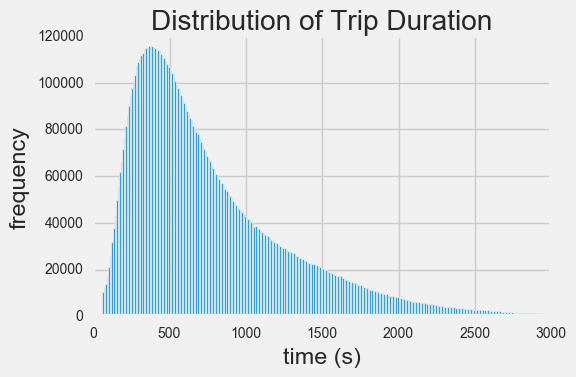

In [14]:
n, bins, patches = plt.hist(trip_duration, bins=300, range=(0,3000)) #n is y axis, bins is x axis!
plt.title('Distribution of Trip Duration')
plt.xlabel('time (s)')
plt.ylabel('frequency')
plt.tight_layout()

In [15]:
print('Mean of Trip Duration: ' + str(int(trip_duration.mean())) + ' seconds') #this is the mean of the frequency
print('Max of Frequency: ' + str(int(n.max())))

Mean of Trip Duration: 968 seconds
Max of Frequency: 116081 seconds


In [16]:
duration_mode = bins[np.argmax(n)] #argmax returns bin index with highest items inside
print('Mode of Trip Duration: ' + str(int(duration_mode)) + ' seconds')

Mode of Trip Duration: 370 seconds


## Question 3
• Make a plot of the total number of trips per hour of the day. **Answer: line graph**

• What does this plot look like if days are broken into weekdays vs weekends? What does this
usage pattern tell you? **Answer: The weekdays plot takes the shape of the original graph. In the weekday graph, there is an increase during commuting hours, and decreases during working hours. For the weekend graph, there is a general increase towards afternoon hours and peaks between 1 to 3pm. In general, there is a significantly less usage on the weekends in comparison to the weekdays.**

• Find another interesting way to segment all or some of the data. Discuss your findings. **Answer: Skipped**

In [17]:
from datetime import datetime as dt

In [18]:
CitiBike_df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750,-73.969,265,Stanton St & Chrystie St,40.722,-73.991,18660,Subscriber,1960.0,2
1,1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743,-74.004,482,W 15 St & 7 Ave,40.739,-73.999,16085,Subscriber,1963.0,1
2,2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.741,-73.986,505,6 Ave & W 33 St,40.749,-73.988,20845,Subscriber,1974.0,1
3,3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683,-73.966,399,Lafayette Ave & St James Pl,40.689,-73.965,19610,Subscriber,1969.0,1
4,4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745,-73.987,432,E 7 St & Avenue A,40.726,-73.984,20197,Subscriber,1977.0,1


In [34]:
CitiBike_df['DATE_TIME'] = pd.to_datetime(CitiBike_df.starttime, format='%m/%d/%Y %H:%M', exact=False)
#exact must be set to False since some of the times are missing seconds
#could have tried infer_datetime_format=True, apparently sometimes this makes it faster
#pd.timestamp

In [60]:
CitiBike_df['DATE_TIME'].head() #sample 

0   2015-01-01 00:01:00
1   2015-01-01 00:02:00
2   2015-01-01 00:04:00
3   2015-01-01 00:04:00
4   2015-01-01 00:05:00
Name: DATE_TIME, dtype: datetime64[ns]

In [88]:
trips_per_hour = CitiBike_df.groupby(CitiBike_df['DATE_TIME'].apply(lambda x: x.hour)).index.count()
#here, I want to first extract the hour of day with an apply function, then groupby each hour and sum the count total.
#I am grouping by index to shorten the df, since i only really care about the number of rows in each hour group

In [89]:
trips_per_hour.sum() #sanity check, to make sure that the groupby count is counting the index properly

9937969

In [107]:
trips_per_hour_df = pd.DataFrame(data=trips_per_hour).reset_index() #make a df of hour of day and count total per hour
trips_per_hour_df.columns = ['hour', 'count'] #for sensibility
trips_per_hour_df

,hour,count
0,0,95057
1,1,53664
2,2,31271
3,3,19409
4,4,17963
5,5,53928
6,6,213904
7,7,446922
8,8,796457
9,9,641339


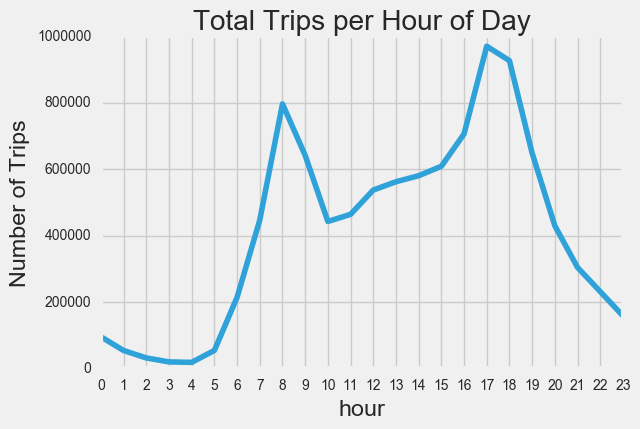

In [113]:
plt.plot(trips_per_hour_df['hour'], trips_per_hour_df['count'])
plt.title('Total Trips per Hour of Day')
plt.xlabel('hour')
plt.ylabel('Number of Trips')
plt.xlim([0, 23])
plt.xticks(range(24));

In [114]:
CitiBike_df['day_of_week'] = CitiBike_df['DATE_TIME'].apply(lambda x: x.weekday()) #0 Monday to 6 Sunday

In [115]:
CitiBike_df['day_of_week'].head()

0    3
1    3
2    3
3    3
4    3
Name: day_of_week, dtype: int64

In [55]:
weekdays = CitiBike_df[CitiBike_df['day_of_week'] < 5]
weekends = CitiBike_df[CitiBike_df['day_of_week'] > 5] #5 and 6 are Saturday and Sunday.

In [123]:
weekdays_trips_per_hour = weekdays.groupby(weekdays['DATE_TIME'].apply(lambda x: x.hour)).index.count()
#the same method as above, but using a truncated df that only includes grouped weekdays
weekdays_trips_per_hour_df = pd.DataFrame(data=weekdays_trips_per_hour).reset_index()
weekdays_trips_per_hour_df.columns = ['hour', 'count']

In [124]:
#now, for weekends!
weekends_trips_per_hour = weekends.groupby(weekends['DATE_TIME'].apply(lambda x: x.hour)).index.count()
weekends_trips_per_hour_df = pd.DataFrame(data=weekends_trips_per_hour).reset_index()
weekends_trips_per_hour_df.columns = ['hour', 'count']

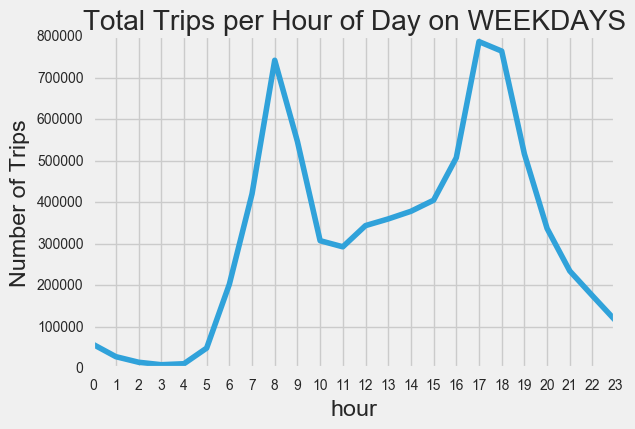

In [125]:
#plot just the weekdays
plt.plot(weekdays_trips_per_hour_df['hour'], weekdays_trips_per_hour_df['count'])
plt.title('Total Trips per Hour of Day on WEEKDAYS')
plt.xlabel('hour')
plt.ylabel('Number of Trips')
plt.xlim([0, 23])
plt.xticks(range(24));

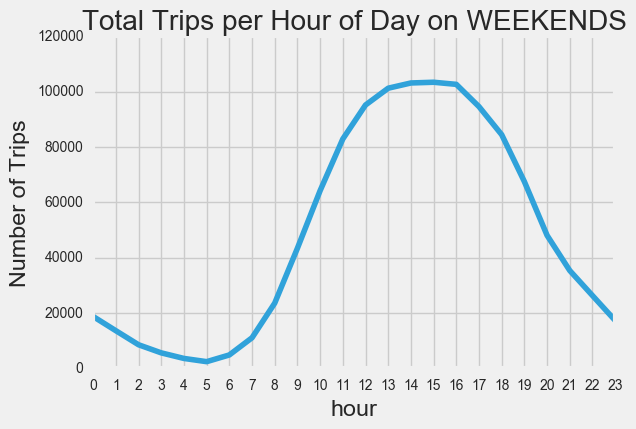

In [127]:
#plot just the weekends
plt.plot(weekends_trips_per_hour_df['hour'], weekends_trips_per_hour_df['count'])
plt.title('Total Trips per Hour of Day on WEEKENDS')
plt.xlabel('hour')
plt.ylabel('Number of Trips')
plt.xlim([0, 23])
plt.xticks(range(24));

In [ ]:
#could have divided counts by 5 for weekdays and weekends by 2 so we normalize counts

## Question 4
• There are instances where a bike's next trip originates from a different station than it was returned to for its most recent previous trip. What do you think causes this?

• Explore this phenomenon.

In [137]:
CitiBike_df.head() #let's remember what we have to work with.

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,DATE_TIME,day_of_week
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750,-73.969,265,Stanton St & Chrystie St,40.722,-73.991,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,3
1,1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743,-74.004,482,W 15 St & 7 Ave,40.739,-73.999,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,3
2,2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.741,-73.986,505,6 Ave & W 33 St,40.749,-73.988,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,3
3,3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683,-73.966,399,Lafayette Ave & St James Pl,40.689,-73.965,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,3
4,4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745,-73.987,432,E 7 St & Avenue A,40.726,-73.984,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,3


In [134]:
CitiBike_df.columns

Index([u'index', u'tripduration', u'starttime', u'stoptime',
       u'start station id', u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'DATE_TIME', u'day_of_week'],
      dtype='object')

In [168]:
next_trip_df = CitiBike_df[['bikeid', 'DATE_TIME', 'start station id', 'start station name', 'end station id', 'end station name']]
next_trip_df.columns = ['bikeid', 'DATE_TIME', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name']
next_trip_df.head() #we want bikeid, time, and start/end station information
#you want to groupby bike ID, and sort by time creating a new column for NEXT TRIP using a shift by one technique,
#we want to see that every END station ID is the same as next station ID (next station ID using start station ID column
#and shifting it up by one)
#create a mask for a column that says TRUE or FALSE if it matches

,bikeid,DATE_TIME,start_station_id,start_station_name,end_station_id,end_station_name
0,18660,2015-01-01 00:01:00,455,1 Ave & E 44 St,265,Stanton St & Chrystie St
1,16085,2015-01-01 00:02:00,434,9 Ave & W 18 St,482,W 15 St & 7 Ave
2,20845,2015-01-01 00:04:00,491,E 24 St & Park Ave S,505,6 Ave & W 33 St
3,19610,2015-01-01 00:04:00,384,Fulton St & Waverly Ave,399,Lafayette Ave & St James Pl
4,20197,2015-01-01 00:05:00,474,5 Ave & E 29 St,432,E 7 St & Avenue A


In [198]:
next_trip_df.tail().groupby('bikeid', as_index=False).apply(lambda x: x.sort_values('DATE_TIME')).reset_index(drop=True)

,level_0,level_1,bikeid,DATE_TIME,start_station_id,start_station_name,end_station_id,end_station_name
0,0,9937967,19782,2015-12-31 21:20:00,3242,Schermerhorn St & Court St,467,Dean St & 4 Ave
1,1,9937966,20663,2015-12-31 17:56:00,3242,Schermerhorn St & Court St,157,Henry St & Atlantic Ave
2,2,9937964,22282,2015-12-31 16:50:00,3242,Schermerhorn St & Court St,261,Johnson St & Gold St
3,3,9937965,22366,2015-12-31 17:17:00,3242,Schermerhorn St & Court St,258,DeKalb Ave & Vanderbilt Ave
4,4,9937968,23411,2015-12-31 21:49:00,3242,Schermerhorn St & Court St,418,Front St & Gold St


In [201]:
next_trip_df.groupby('bikeid', as_index=False).start_station_id.mean().head()
#this is saying, for every bike(id), aggregate the total number of times 

,bikeid,start_station_id
0,14529,563.306
1,14530,724.291
2,14531,558.432
3,14532,609.596
4,14533,611.873


In [149]:
sorted(CitiBike_df['DATE_TIME'].head())

[Timestamp('2015-01-01 00:01:00'),
 Timestamp('2015-01-01 00:02:00'),
 Timestamp('2015-01-01 00:04:00'),
 Timestamp('2015-01-01 00:04:00'),
 Timestamp('2015-01-01 00:05:00')]

In [162]:
next_trip_df = CitiBike_df.tail().groupby('bikeid').DATE_TIME.head()

In [165]:
next_trip_df.count

<bound method Series.count of 9937964   2015-12-31 16:50:00
9937965   2015-12-31 17:17:00
9937966   2015-12-31 17:56:00
9937967   2015-12-31 21:20:00
9937968   2015-12-31 21:49:00
Name: DATE_TIME, dtype: datetime64[ns]>

## Question 5
• Build a predictive model(s) for the total number of daily CitiBike trips. This model should include at least some features from an external data source, i.e. that is not included in the CitiBike data.

• Evaluate your model(s), discuss pros/cons, and alternative approaches.

In [ ]:
#use the weather data to compare times

## Question 6
• Using the tool of your preference, develop a visualization that displays something interesting about the data. **Answer: Skipped**